In [53]:
import os 
print(os.getcwd())

/Users/reynoldtakurachoruma


In [54]:
import pandas as pd
path = "/Users/reynoldtakurachoruma/Downloads/GSAF5 1(Sheet1-GSAF).csv"

for enc in ["utf-8-sig", "cp1252", "latin1"]:
    try:
        df = pd.read_csv('/Users/reynoldtakurachoruma/GSAF5(Sheet1-GSAF).csv')
        print(f" Read with encoding: {enc}  |  shape={df.shape}")
        break
    except UnicodeDecodeError as e:
        print(f"failed with  {enc}: {e}")

df.head()
df.info()

 Read with encoding: utf-8-sig  |  shape=(39145, 255)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39145 entries, 0 to 39144
Columns: 255 entries, Date to Unnamed: 254
dtypes: float64(234), object(21)
memory usage: 76.2+ MB


/var/folders/00/c54qzf757tzdyqs5hr4n94vc0000gn/T/ipykernel_64835/3688720642.py:6: DtypeWarning: Columns (0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/reynoldtakurachoruma/GSAF5(Sheet1-GSAF).csv')


### DATA REVIEW 

In [55]:
df.head(20)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254
0,14th October,2025.0,Unprovoked,Columbia,"Bolivar, del Isolate",Catagena Province,Swimming with sharks,Male child,M,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11th October,2025.0,Unprovoked,Australia,Queensland,Cook Esplanade Thursday Island,Fishing/swimming,Samuel Nai,M,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7th October,2025.0,Unprovoked,Australia,South Australia,Kangaroo Island,Surfing,Lee Berryman,M,50+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29th September,2025.0,Unprovoked,USA,Off California,Catalina Island,Swimming,Christopher Murray,M,54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27th September,2025.0,Provoked,Costa Rica,NaN,Cocos Islands,Diving-Tagging sharks,Dr. Mauricio Hoyos,M,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6th September,2025.0,Unprovoked,Australia,NSW,Long Reef Sydney,Surfing,Mercury Psillaskis,M,57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1st September,2025.0,Unprovoked,USA,Florida,Horseshoe reef Key Largo,Snorkeling,Richard Burrows,M,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,30th August,2025.0,Unprovoked,USA,Texas,Galveston,Swimming,Harper Ochoa,F,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## INITIAL REVIEW

In [56]:
print("Initial Data Info:")
df.info()
print("\nFirst 5 Rows:")
print(df.head())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39145 entries, 0 to 39144
Columns: 255 entries, Date to Unnamed: 254
dtypes: float64(234), object(21)
memory usage: 76.2+ MB

First 5 Rows:
             Date    Year        Type     Country                  State  \
0    14th October  2025.0  Unprovoked    Columbia   Bolivar, del Isolate   
1    11th October  2025.0  Unprovoked   Australia             Queensland   
2     7th October  2025.0  Unprovoked   Australia        South Australia   
3  29th September  2025.0  Unprovoked         USA         Off California   
4  27th September  2025.0    Provoked  Costa Rica                    NaN   

                         Location               Activity                Name  \
0               Catagena Province   Swimming with sharks          Male child   
1  Cook Esplanade Thursday Island       Fishing/swimming          Samuel Nai   
2                 Kangaroo Island                Surfing        Lee Berryman   
3             

In [57]:
# Check missing values percentage
missing_percent = df.isnull().mean() * 100
print("\nMissing Values Percentage:")
print(missing_percent[missing_percent > 0].sort_values(ascending=False))


Missing Values Percentage:
Unnamed: 127    100.000000
Unnamed: 175    100.000000
Unnamed: 162    100.000000
Unnamed: 163    100.000000
Unnamed: 164    100.000000
                   ...    
Injury           82.079448
Source           82.041129
Type             82.036020
Year             81.995146
Date             81.990037
Length: 255, dtype: float64


### UNIQUE VALUES IN KEY COLUMNS 

In [81]:
# Normalize column names (strip whitespace, remove BOM if present)
df.columns = df.columns.astype(str).str.replace('\ufeff', '', regex=False).str.strip()

def print_unique(col, n=10):
	if col in df.columns:
		vals = df[col].dropna().unique()
		print(f"{col}: {df[col].nunique()} {vals[:n]}")
	else:
		print(f"{col}: COLUMN NOT FOUND. Available columns (sample): {list(df.columns[:20])}")

print("\nUnique Values in Key Columns:")
print_unique("Country")
print_unique("Activity")
print_unique("Age")
print_unique("Fatal Y/N")
print_unique("Species")


Unique Values in Key Columns:
Country: 212 ['Columbia' 'Australia' 'Usa' 'Costa Rica' 'Bahamas' 'Puerto Rico'
 'French Polynesia' 'Spain' 'Canary Islands' 'South Africa']
Activity: 1527 ['swimming with sharks' 'fishing/swimming' 'surfing' 'swimming'
 'diving-tagging sharks' 'snorkeling' 'spearfishing' 'fishing' 'wading'
 'kayaking']
Age: 82 [14 24 54 48 57  8 63  9 39 19]
Fatal Y/N: 8 ['N' 'Y' 'F' 'M' 'NQ' 'UNKNOWN' '2017' 'Y X 2']
Species: 1612 ['nurse shark' 'tiger or bull shark' 'bronze whaler?' 'unknown 1.2m shark'
 'tiger shark 4m' 'great white shark' 'not stated'
 '5m (16.5ft) great white' 'undetermined' 'lemon shark 1.8 m (6ft)']


### DATA LOSS CHECK BEFORE CLEANING 

In [83]:
initial_rows = len(df)
print(f"Initial Rows: {initial_rows}")

Initial Rows: 6999


### DATA CLEANING : REMOVING EMPTY OR IRRELEVANT COLUMNS .

(TECHNIQUE 1: DROPPING COLUMNS )

In [84]:
# Drop fully empty columns, but review first
empty_cols = [col for col in df.columns if df[col].isnull().all()]
print(f"Empty Columns to Drop: {empty_cols}")
df.drop(columns=empty_cols, inplace=True)

Empty Columns to Drop: []


In [85]:
# Drop irrelevant columns (PDF, HREF, etc.), but confirm they exist
irrelevant_cols = [col for col in ['pdf', 'href formula', 'href', 'Case Number', 'original order', 'Unnamed: 21', 'Unnamed: 22', 'Case Number.1'] if col in df.columns]
print(f"Irrelevant Columns to Drop: {irrelevant_cols}")
df.drop(columns=irrelevant_cols, inplace=True)

Irrelevant Columns to Drop: []


## POST DROP REVIEW 

In [86]:
print(f"Rows after column drops: {len(df)} (Loss: {initial_rows - len(df)}) / {initial_rows * 100 / initial_rows:.2f}% remaining")
df.info()

Rows after column drops: 6999 (Loss: 0) / 100.00% remaining
<class 'pandas.core.frame.DataFrame'>
Index: 6999 entries, 0 to 7049
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6116 non-null   datetime64[ns]
 1   Year       6999 non-null   int64         
 2   Type       6981 non-null   object        
 3   Country    6999 non-null   object        
 4   State      6548 non-null   object        
 5   Location   6999 non-null   object        
 6   Activity   6999 non-null   object        
 7   Name       6784 non-null   object        
 8   Sex        6424 non-null   object        
 9   Age        6999 non-null   int64         
 10  Injury     6966 non-null   object        
 11  Fatal Y/N  6999 non-null   object        
 12  Time       3517 non-null   object        
 13  Species    6999 non-null   object        
 14  Source     6979 non-null   object        
 15  month      6999 non-null   int64  

## DATA CLEANING : HANDLING DUPLICATES 

TECHNIQUE 2:REMOVING DUPLICATES 

In [87]:
rows_before = len(df)
df.drop_duplicates(inplace=True)
print(f"Rows after dropping duplicates: {len(df)} (Duplicates Removed: {rows_before - len(df)})")


Rows after dropping duplicates: 6999 (Duplicates Removed: 0)


## DATA CLEANING : STANDARDIZED COLUMNS 

TECHNIQUE 3: STRING MANIPULATION / FORMATTING 

In [88]:
# Country: Strip, title case, drop missing
rows_before = len(df)
df = df.dropna(subset=['Country'])
df['Country'] = df['Country'].str.strip().str.title()
print(f"Rows after cleaning Country: {len(df)} (Loss: {rows_before - len(df)})")

Rows after cleaning Country: 6999 (Loss: 0)


In [89]:
# Activity: Lowercase, strip, impute 'unknown'
df['Activity'] = df['Activity'].str.strip().str.lower().fillna('unknown')


In [90]:
# Species: Lowercase, strip, impute 'unknown'
df['Species'] = df['Species'].str.strip().str.lower().fillna('unknown')


### DATA CLEANING : REGEX FOR STRING EXTRACTION 

TECHNIQUE 4: REGEX 

In [92]:
import re

# Example: Extract numbers from Age if mixed (e.g., '20s' → 20)
def extract_age_with_regex(age):
    if isinstance(age, str):
        match = re.search(r'\\d+', age)
        if match:
            return int(match.group())
    return age

df['Age'] = df['Age'].apply(extract_age_with_regex)

# Example: Clean Location with regex (remove extra chars)
df['Location'] = df['Location'].astype(str).apply(lambda x: re.sub(r'[^a-zA-Z0-9\\s]', '', x).strip())

## DATA CLEANING : HANDLE MISSING & NUMERIC COLUMNS 

TECHNIQUE 5: IMPUTATION

In [93]:
# Year: To numeric, impute median
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
median_year = df['Year'].median()
missing_years = df['Year'].isnull().sum()
print(f"Missing Years: {missing_years} | Imputing with median {median_year}")
df['Year'].fillna(median_year, inplace=True)
df['Year'] = df['Year'].astype(int)


Missing Years: 0 | Imputing with median 1987.0


/var/folders/00/c54qzf757tzdyqs5hr4n94vc0000gn/T/ipykernel_64835/3022902097.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year'].fillna(median_year, inplace=True)


In [94]:
# Age: To numeric, impute median (after regex clean)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
median_age = df['Age'].median()
missing_ages = df['Age'].isnull().sum()
print(f"Missing Ages: {missing_ages} | Imputing with median {median_age}")
df['Age'].fillna(median_age, inplace=True)
df['Age'] = df['Age'].astype(int)


Missing Ages: 0 | Imputing with median 24.0


/var/folders/00/c54qzf757tzdyqs5hr4n94vc0000gn/T/ipykernel_64835/2617893970.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)


In [95]:
# Fatal Y/N: Standardize to Y/N, impute 'N' (assuming non-fatal if missing, per dataset note)
df['Fatal Y/N'] = df['Fatal Y/N'].str.strip().str.upper().fillna('N')
df['Fatal Y/N'] = df['Fatal Y/N'].replace({'FATAL': 'Y', 'YES': 'Y', 'NO': 'N'})  # Standardize variations

### DATA CLEANING: DATE PARSING 

In [96]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
df['month'] = df['Date'].dt.month.fillna(0).astype(int)  # 0 for unknown
df['year'] = df['Date'].dt.year.fillna(df['Year']).astype(int)

## EXPLORATORY DATA ANALYSIS

STATISTICAL SUMMARY 

In [97]:
print("\nStatistical Summary for Numeric Columns:")
print(df[['Age', 'Year']].describe())



Statistical Summary for Numeric Columns:
               Age         Year
count  6999.000000  6999.000000
mean     26.321474  1937.350336
std      11.147705   267.025979
min       1.000000     0.000000
25%      22.000000  1949.000000
50%      24.000000  1987.000000
75%      26.000000  2010.000000
max      87.000000  2026.000000



Top 5 Countries by Attacks:
Country
Usa             2572
Australia       1510
South Africa     599
New Zealand      146
Bahamas          141
Name: count, dtype: int64


/var/folders/00/c54qzf757tzdyqs5hr4n94vc0000gn/T/ipykernel_64835/1616387529.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="Blues_d",)


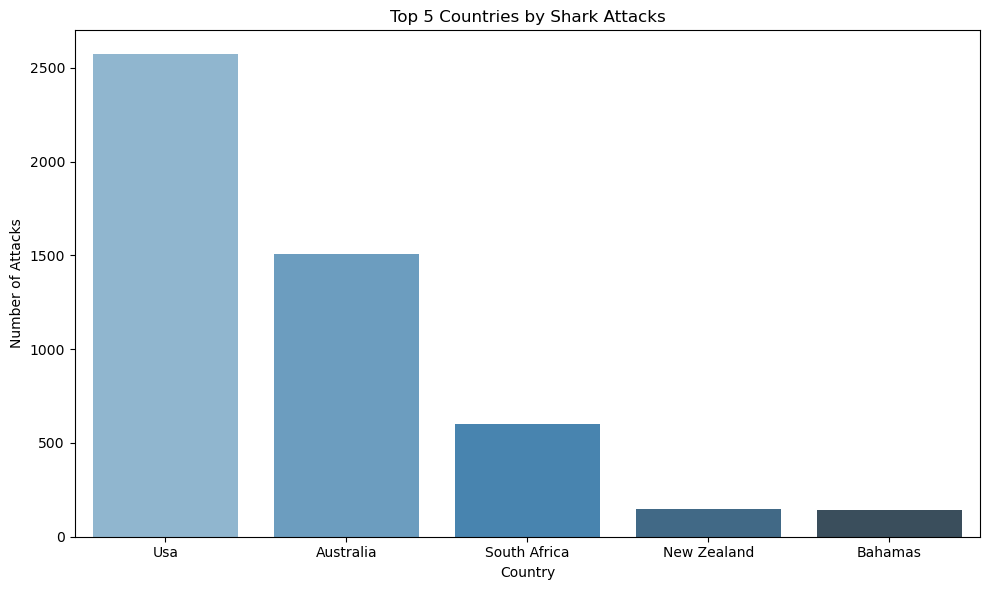

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top Countries by Attacks
top_countries = df['Country'].value_counts().head(5)
print("\nTop 5 Countries by Attacks:")
print(top_countries)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="Blues_d",)
plt.title('Top 5 Countries by Shark Attacks')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.tight_layout()
plt.show()

# Hypothesis 1 Validation: Attacks in Australia/USA

In [99]:

print("\nHypothesis 1: Attacks more common in Australia/USA - Validated if top.")


Hypothesis 1: Attacks more common in Australia/USA - Validated if top.



Top 5 Activities:
Activity
surfing         1144
swimming        1045
unknown          581
fishing          509
spearfishing     397
Name: count, dtype: int64


/var/folders/00/c54qzf757tzdyqs5hr4n94vc0000gn/T/ipykernel_64835/2935759237.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_activities.index, y=top_activities.values, palette="Oranges_d")


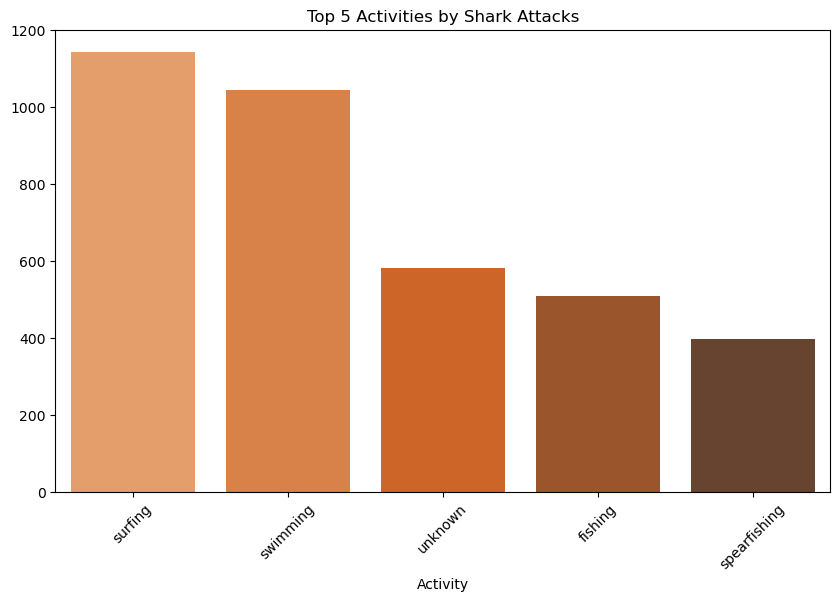

In [103]:
# Top Activities
top_activities = df['Activity'].value_counts().head(5)
print("\nTop 5 Activities:")
print(top_activities)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_activities.index, y=top_activities.values, palette="Oranges_d")
plt.title('Top 5 Activities by Shark Attacks')
plt.xticks(rotation=45)
plt.show()

# Hypothesis 2: Surfing highest - Check if 'surfing' is top.



Top 5 Countries by Fatal Attacks:
Country
Australia           308
Usa                 199
South Africa        110
Papua New Guinea     58
Mexico               50
Name: count, dtype: int64


/var/folders/00/c54qzf757tzdyqs5hr4n94vc0000gn/T/ipykernel_64835/1016189467.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_fatal_countries.index, y=top_fatal_countries.values, palette="Reds")


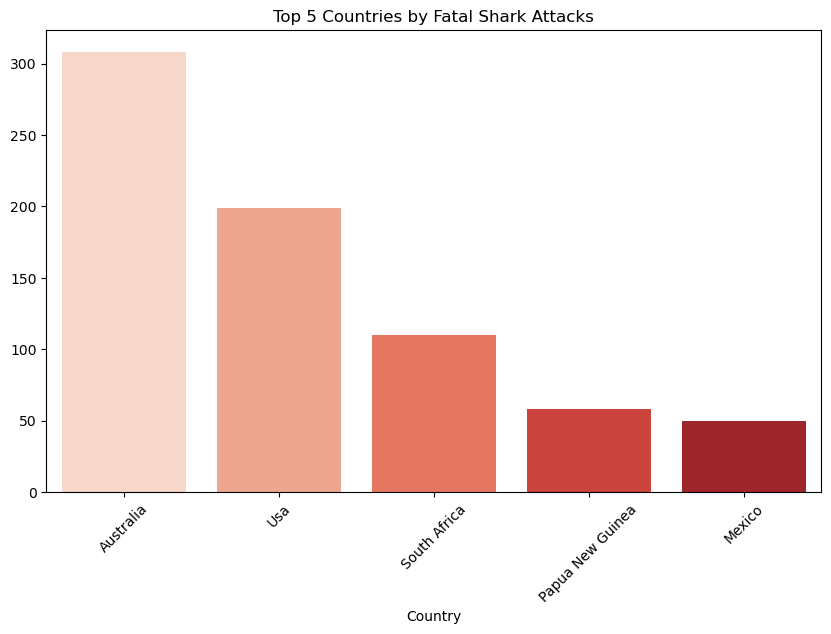

In [104]:
# Fatal Attacks
fatal_df = df[df['Fatal Y/N'] == 'Y']
top_fatal_countries = fatal_df['Country'].value_counts().head(5)
print("\nTop 5 Countries by Fatal Attacks:")
print(top_fatal_countries)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_fatal_countries.index, y=top_fatal_countries.values, palette="Reds")
plt.title('Top 5 Countries by Fatal Shark Attacks')
plt.xticks(rotation=45)
plt.show()

# Hypothesis 3: Fatal during swimming vs surfing

In [105]:
activity_fatal = pd.crosstab(df['Activity'], df['Fatal Y/N'], normalize='index') * 100
print("\nFatality Rate by Activity (%):")
print(activity_fatal[activity_fatal.index.isin(['swimming', 'surfing'])])
# Validation: Compare Y column for swimming vs surfing.


Fatality Rate by Activity (%):
Fatal Y/N  2017         F    M          N        NQ   UNKNOWN          Y  \
Activity                                                                   
surfing     0.0  0.087413  0.0  93.618881  0.087413  0.524476   5.681818   
swimming    0.0  0.095694  0.0  66.794258  0.000000  0.574163  32.535885   

Fatal Y/N  Y X 2  
Activity          
surfing      0.0  
swimming     0.0  


In [106]:
under_30_pct = (df['Age'] < 30).mean() * 100
print(f"\nHypothesis 5: {under_30_pct:.2f}% of victims under 30.")



Hypothesis 5: 79.25% of victims under 30.


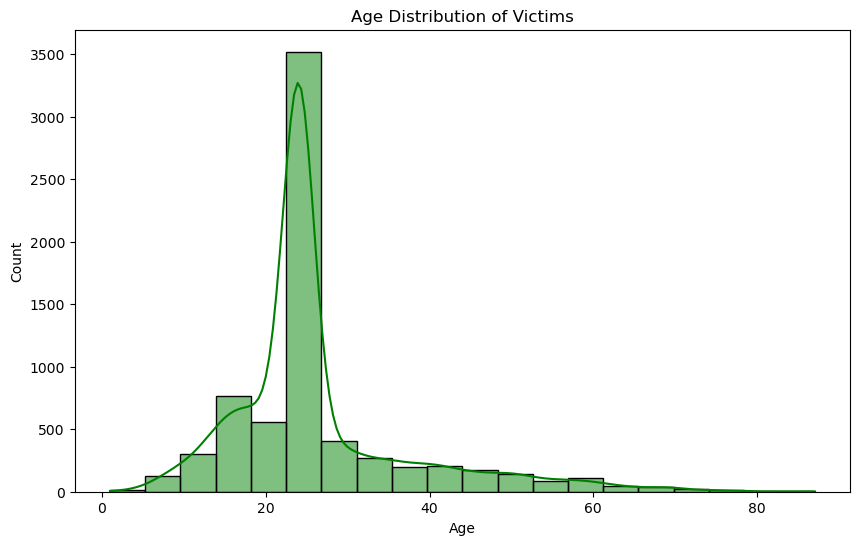

In [107]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='green')
plt.title('Age Distribution of Victims')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Seasonal Trends (Hypothesis 4)

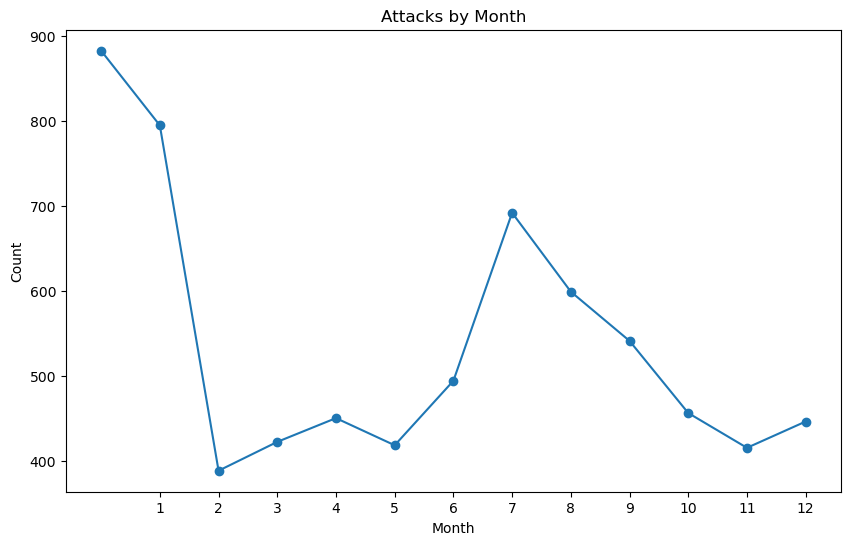

In [108]:
monthly_attacks = df['month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
monthly_attacks.plot(kind='line', marker='o')
plt.title('Attacks by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(1, 13))
plt.show()
# Validation: Peaks in 6-8.